<a href="https://colab.research.google.com/github/praveenkumarbalakrishnan/tasks/blob/main/SIG731_Data_Wrangling_Task3P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Task 3P: SIG731-Data Wrangling

**Name:** Praveenkumar Balakrishnan

**Student Number:** 223029369

**Email Address:** s223029369@deakin.edu.au

# Import Statements

In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import warnings
warnings.filterwarnings('ignore')

# Tasks

**Task 1**

From https://github.com/gagolews/teaching-data/tree/master/marek, download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset):

• nhanes_adult_male_bmx_2020.csv

• nhanes_adult_female_bmx_2020.csv

They give body measurements of adult males and females.

Downloaded the given files and uploaded in the input data directory

**Task 2**

Read the two files as numpy matrices named male and female. Each matrix consists of seven
columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).

Read the data using pandas.read_csv and filtered the commented line starts with "#" and converted it into numpy matrices each consist of 7 columns

In [102]:
male_df = pd.read_csv(
    "/content/drive/MyDrive/Inputs/nhanes_adult_male_bmx_2020.csv",
     comment="#")
female_df = pd.read_csv(
    "/content/drive/MyDrive/Inputs/nhanes_adult_female_bmx_2020.csv",
     comment="#")
male = male_df.to_numpy()
female = female_df.to_numpy()


**Task 3**

On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female weights (top subfigure). and for male weights (bottom subfigure) Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

The first column in both the loaded numpy array is weight column so took 0th column from male and female numpy arrays and plotted the histogram vertically stacked which is female weight in top subfigure and male weight in bottom subfigure. Used set_xlim to make the xaxis limits identical to both subfigures

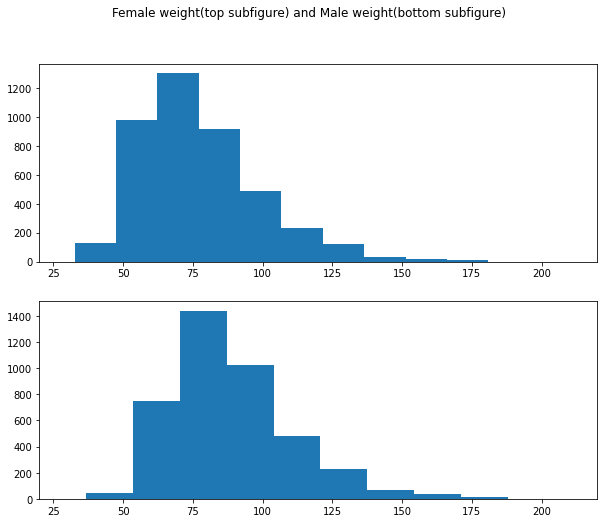

In [103]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
fig.suptitle('Female weight(top subfigure) and Male weight(bottom subfigure)')
ax1.hist(female[:, 0])
ax2.hist(male[:, 0])
ax1.set_xlim(left=20, right=220)
ax2.set_xlim(left=20, right=220)
plt.show()

**Task4**

Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. Note that the boxplot function can be fed with a list of two vectors like [female_weights, male_weights]. In your own words, discuss the results.

The first column in both the loaded numpy array is weight column so took 0th column from male and female numpy arrays and plotted the box plot side by side

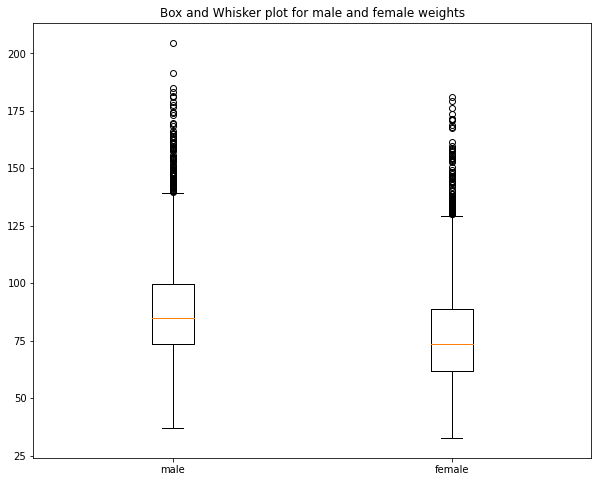

In [104]:
plt.figure(figsize=(10, 8))
plt.title("Box and Whisker plot for male and female weights")
male_weights = male[:, 0]
female_weights = female[:, 0]
plt.boxplot(
    x=[male_weights, female_weights],
    labels=["male", "female"])
plt.show()

In the above boxplot we can see significant outliers in both the male and female weights also the maximum weight of male is higher compared to maximum weight of female. The outliers are only in the upper side which is above 
Q3 + 1.5 times of IQR and no outliers in the lower side which is below 
Q1 - 1. times of IQR. In both male and female weights median is closer to lower quartile(Q1) compared to the upper quartile(Q3). Median closer to lower quartile and outliers are only in upperside indicates that the data is possitively skewed.

**Task5**

Compute the basic numerical aggregates of the male and female weights (measures of location,
dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are
they left skewed, which one has more dispersion, and so forth).

In [105]:
def generate_numerical_stats(input_np_array, label):
  """
  This function is to generate numerical stats for the given input. It will 
  generate minimum, 25th percentile, mean, median, 75th percentile, maximum,
  iqr, std and skewness and print the same.

  Parameters
  ----------
  input_np_array: numpy array
    numpy array
  label: str
    Label for the print statement
  Returns
  -------
  min_val: float
    Minimum value of the given array
  q1_val: float
    25th percentile of the given array
  mean_val: float
    Arithmetic mean of the given array
  median_val: float
    50th percentile of the given arary
  q3_val: float
    75th percentile of the given array
  max_val: float
    Maximum value of the given array
  iqr: float
    Inter quartile range of the given array
  std_val: float
    Standard deviation of the given arary
  skewness_val: float
    Skewness of the given array
  """
  mean_val = np.mean(input_np_array)
  min_val, q1_val, median_val, q3_val, max_val = np.quantile(
      input_np_array, [0.0, 0.25, 0.5, 0.75, 1.0])
  iqr_val = q3_val - q1_val
  std_val = np.std(input_np_array, ddof=1)
  skewness_val = scipy.stats.skew(input_np_array)
  print(
      f"Minimum value of the {label} is {min_val}\n" +
      f"25th percentile of the {label} is {q1_val}\n" +
      f"Mean of the {label} is {mean_val}\n" +
      f"Median of the {label} is {median_val}\n" +
      f"75th percentile of the {label} is {q3_val}\n" +
      f"Maximum value of the {label} is {max_val}\n" +
      f"IQR of the {label} is {iqr_val}\n" +
      f"Standard deviation of the {label} is {std_val}\n" +
      f"Skewness of the {label} is {skewness_val}\n"
  )
  return (min_val, q1_val, mean_val, median_val,
          q3_val, max_val, iqr_val, std_val, skewness_val)

In [106]:
(mw_min_val, mw_q1_val, mw_mean_val,
 mw_median_val, mw_q3_val, mw_max_val,
 mw_iqr_val, mw_std_val, mw_skewness_val) = generate_numerical_stats(
     male[:, 0], "male weight"
 )

(fw_min_val, fw_q1_val, fw_mean_val,
 fw_median_val, fw_q3_val, fw_max_val,
 fw_iqr_val, fw_std_val, fw_skewness_val) = generate_numerical_stats(
     female[:, 0], "female weight"
 )

Minimum value of the male weight is 36.8
25th percentile of the male weight is 73.3
Mean of the male weight is 88.36454300416565
Median of the male weight is 85.0
75th percentile of the male weight is 99.8
Maximum value of the male weight is 204.6
IQR of the male weight is 26.5
Standard deviation of the male weight is 21.421561426840427
Skewness of the male weight is 0.9842810741662347

Minimum value of the female weight is 32.6
25th percentile of the female weight is 61.6
Mean of the female weight is 77.40379057095475
Median of the female weight is 73.6
75th percentile of the female weight is 88.7
Maximum value of the female weight is 180.9
IQR of the female weight is 27.1
Standard deviation of the female weight is 21.545060568892968
Skewness of the female weight is 1.03336107186799



Mean of both male and female weights are higher than the median of the corresponding weights which indicates that both the male and female weights are positively skewed. Based on the measures of location(minimum, 25th percentile, mean, median, 75th percentile, maximum) it been evident that the male weights are higher in general compared to the female weights. Standard deviation of male weights is little bit lower then female weights and iqr(i.e central portion of data spread) of male weights is lower than the female weights which means female weights have more dispersion compared to male weights. Skeness values are closer to 1 for both male and female weights which indicates that the data is right skewed.

**Task 6**

To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In the loaded female numpy array 0th column index is the weight column in kg and 1st column index is the height column in cm so converted height in cm to m for the bmi calculation and calclulated the bmi using $BMI = weight(kg) / (height(m)**2)$. Added that bmis as a 7th column index(8th column) in female numpy array

In [107]:
female_weights = female[:, 0]
female_heights_meter = np.round(female[:, 1] / 100, 2)
female_bmis = np.round(female_weights / (female_heights_meter ** 2), 2).reshape(-1, 1)
female = np.append(female, female_bmis, axis=1)

**Task 7**

Create a newmatrix zfemale being a version of the female dataset with all its columns standardised(by computing the z-scores of each column).

Z score is been calculated using $Z score = (x - mean) / sd$, used apply_along_axis to apply it in axis 0 to apply for each column

In [108]:
def standardise(x):
  """
  This function is to standardize the input numpy array

  Parameters
  ----------
  x: numpy array
    Input numpy array
    
  Returns
  -------
  z_score: float
    Z score of the given array
  """
  return (x-np.mean(x))/np.std(x, ddof=1)

zfemale = np.round(np.apply_along_axis(standardise, 0, female), 2)

**Task 8**

Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale). Compute Pearson’s and
Spearman’s correlation coefficients for all pairs of variables. Interpret the obtained results.

Plotted pair plot for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale) and computed pearson's and spearman's correlation coeffcient for all pairs

In [109]:
def plot_corr(x, y, ax=None, **kws):
  """
  This function is to annotate the pearsonr and spearmanr in the pairplot

  Parameters
  ----------
  x: numpy array
    Input numpy array 1
  y: numpy array
    Input numpy array 2
  """
  r = scipy.stats.pearsonr(x, y)[0]
  ρ = scipy.stats.spearmanr(x, y)[0]
  ax = ax or plt.gca()
  ax.annotate(f"r = {r:.2f}", xy=(.1, .9), xycoords=ax.transAxes)
  ax.annotate(f"ρ = {ρ:.2f}", xy=(.1, 0.8), xycoords=ax.transAxes)

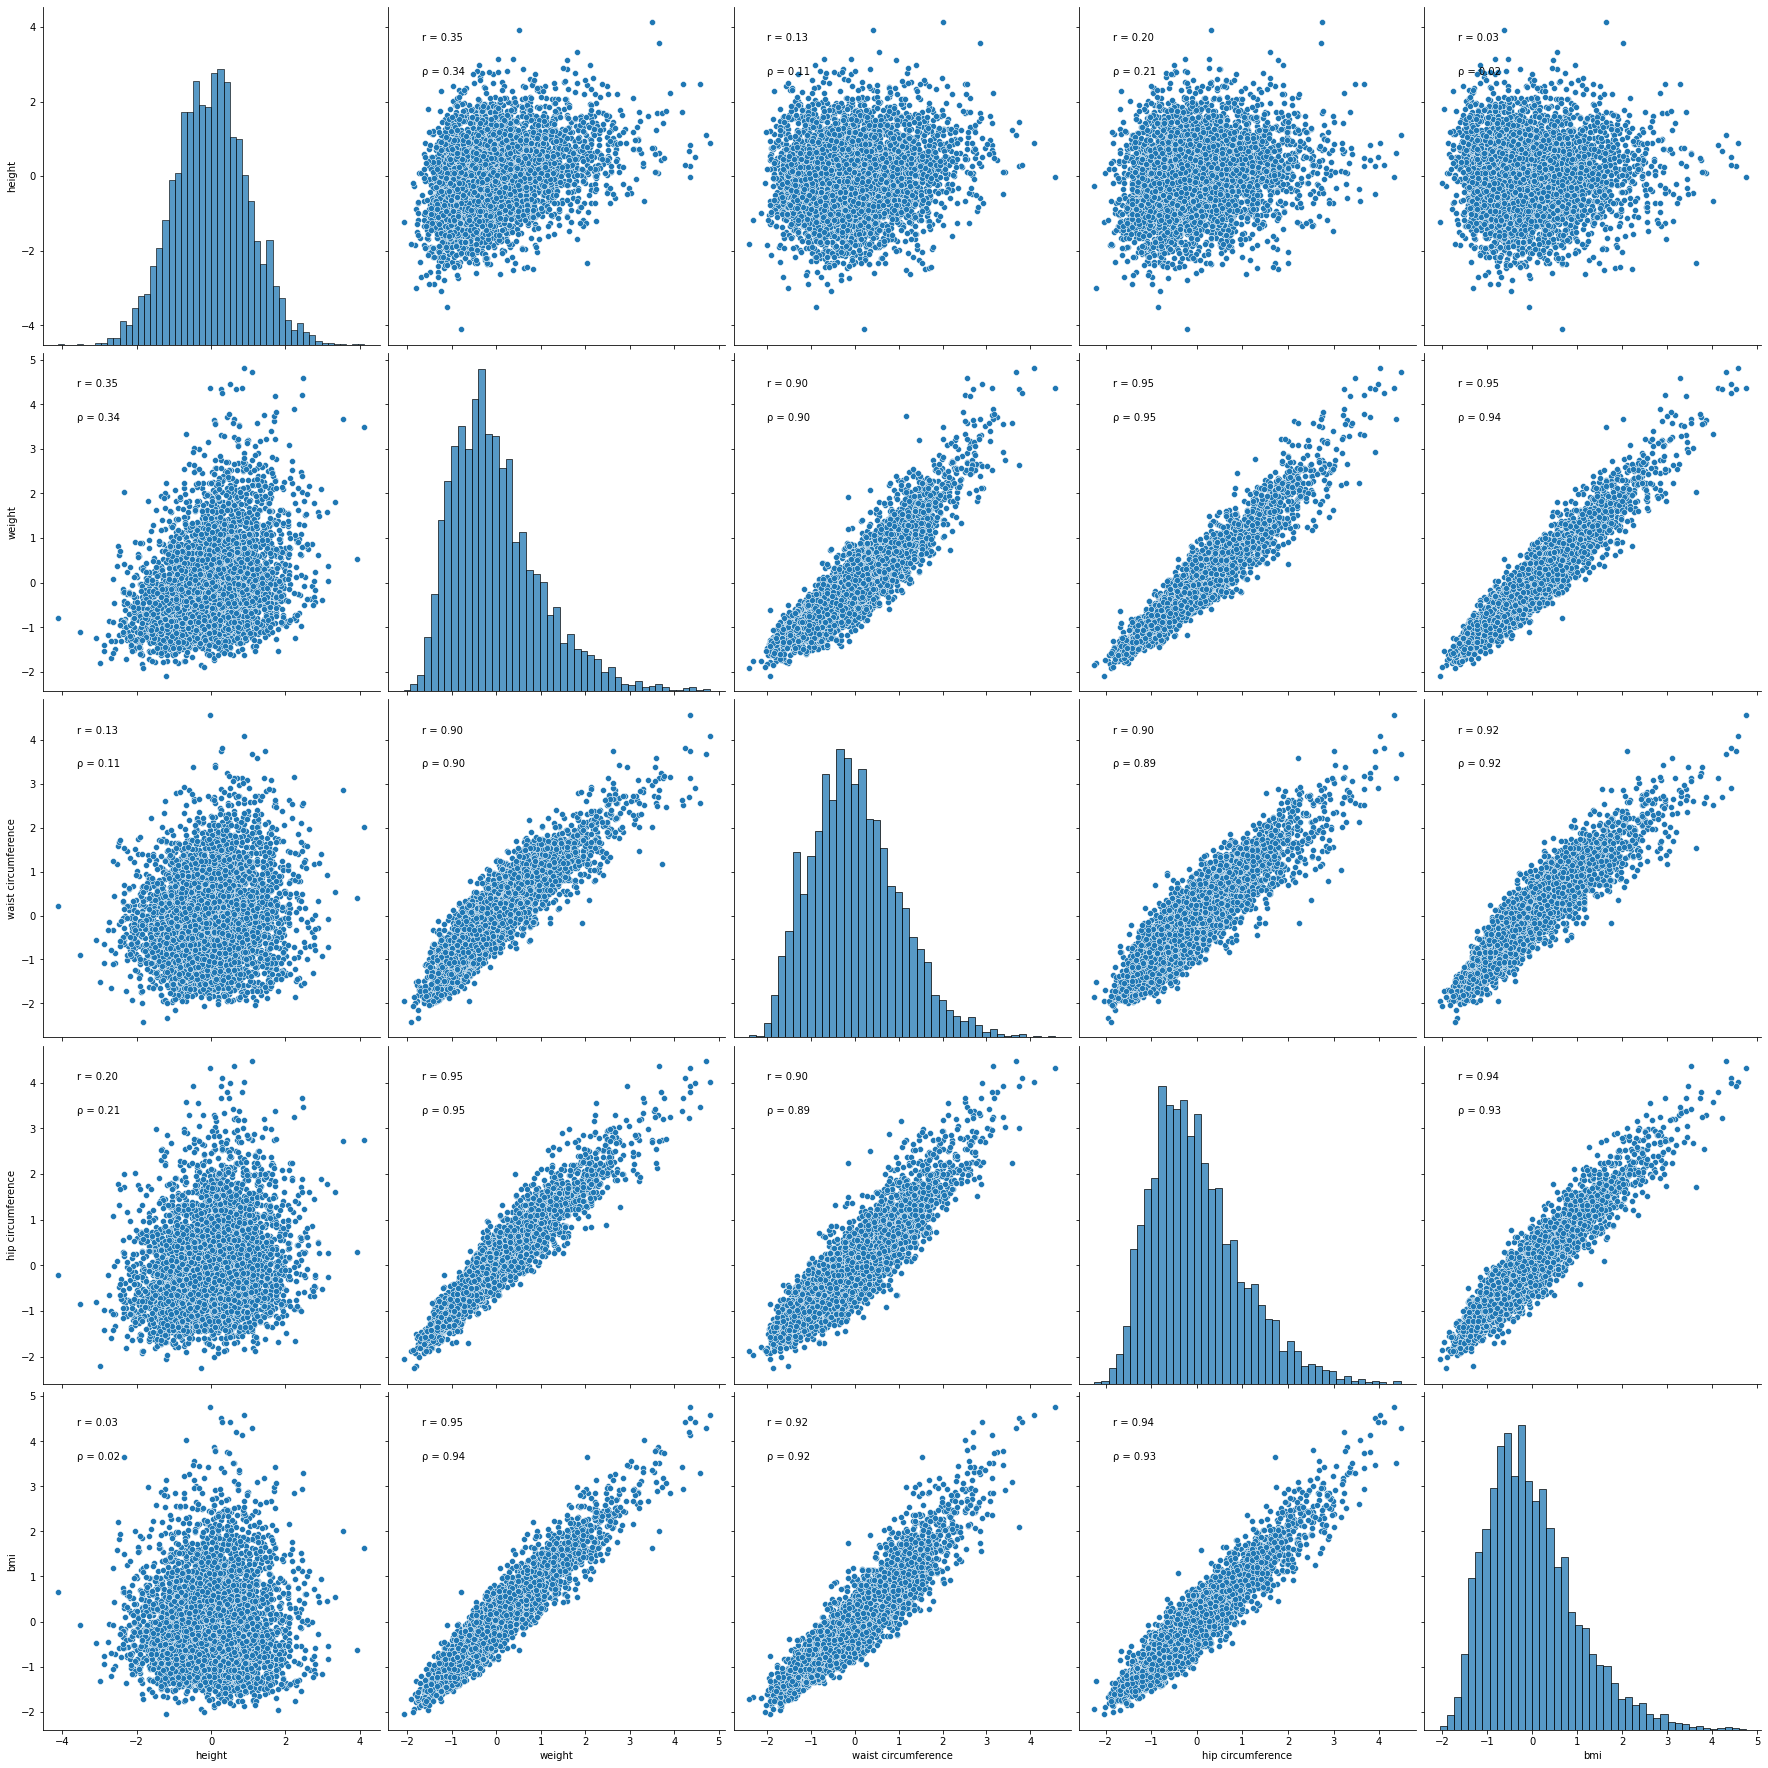

In [110]:
df = pd.DataFrame(zfemale[:, [1, 0, 6, 5, 7]], columns=[
    'height', 'weight', 'waist circumference', 'hip circumference', 'bmi'])
pplot = sns.pairplot(df, height=5)
pplot.map_lower(plot_corr)
pplot.map_upper(plot_corr)
plt.show()

Diagonal histogram shows that height is normally distributed and other colums( weight, waist circumference, hip circumference and bmi) are slightly right skewed. Scatter plot, pearson's correlation(linear relationship) and spearman's correlation(monotonic relationship) coeffcient shows that there is no linear/ monotonic relation between height and other variable which are weight, waist circumference, hip circumference and bmi(it applies to all permutations like height and weight, weight and height, height and waist circumference, waist circumference and height etc). weight has linear correlation with waist circumference, hip circumference and bmi(same applies to waist circumference and hip circumference, hip circumference and bmi etc).

**Task9**

Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

Added 2 columns waist circumference to height ratio and waist circumference to hip circumference ratio to male and female arrays. 

Note: In previous task(Task 6) BMI is added to female array

In [111]:
def generate_waist_hieght_ratio(waist_circumferences, heights):
  """
  This function is to generate waist to height ratio in the given numpy array. 
  Both waist circumference and height should be in the same unit

  Parameters
  ----------
  waist_circumferences: numpy array
    Waist circumferences array
  heights: numpy array
    Heights array
    
  Returns
  -------
  waist_height_ratios: numpy array
    waist to height ratio array
  """
  waist_height_ratios = np.round(waist_circumferences / heights, 2)
  return waist_height_ratios.reshape(-1, 1)

def generate_waist_hip_ratio(waist_circumferences, hip_circumferences):
  """
  This function is to generate waist to hip ratio in the given numpy array. 
  Both waist circumference and hip circumference should be in the same unit

  Parameters
  ----------
  waist_circumferences: numpy array
    Waist circumferences array
  hip_circumferences: numpy array
    Hip circumferences array
    
  Returns
  -------
  waist_hip_ratios: numpy array
    waist to hip ratio array
  """
  waist_hip_ratios = np.round(waist_circumferences / hip_circumferences, 2)
  return waist_hip_ratios.reshape(-1, 1)

male = np.append(
    male, generate_waist_hieght_ratio(male[:, 6], male[:, 1]), axis=1)
female = np.append(
    female, generate_waist_hieght_ratio(female[:, 6], female[:, 1]), axis=1)

male = np.append(
    male, generate_waist_hip_ratio(male[:, 6], male[:, 5]), axis=1)
female = np.append(
    female, generate_waist_hip_ratio(female[:, 6], female[:, 5]), axis=1)

[120.4  86.8 109.6 ... 114.7  97.1  86.9] [108.2  94.5 107.8 ... 118.   99.8  90.5] [1.11 0.92 1.02 ... 0.97 0.97 0.96]
[117.9 103.1  92.  ...  99.3  98.5 110. ] [126.1 125.5 106.2 ... 104.6 102.4 121.4] [0.93 0.82 0.87 ... 0.95 0.96 0.91]


**Task 10**

Draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waist-to-height ratio and the waist-to-hip ratio of both male and female participants. Explain what you
see.

Box and whisker plot to compare waist-to-height ratio and the waist-to-hip ratio of the male and female participant

Note: In previous task(Task 6) BMI is added to female array so for female 8th column index is waist_to_height_ratio and 9th column is waist_to_hip_ratio



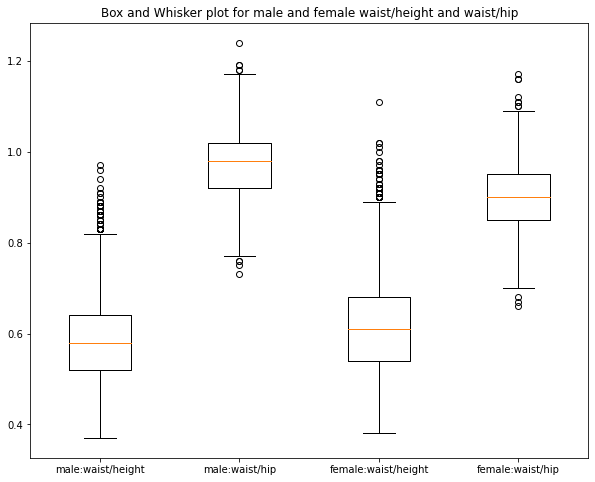

In [125]:
plt.figure(figsize=(10, 8))
plt.title("Box and Whisker plot for male and female waist/height and waist/hip")
male_waist_to_height_ratio = male[:, 7]
male_waist_to_hip_ratio = male[:, 8]
female_waist_to_height_ratio = female[:, 8]
female_waist_to_hip_ratio = female[:, 9]
plt.boxplot(
    x=[male_waist_to_height_ratio, male_waist_to_hip_ratio,
       female_waist_to_height_ratio, female_waist_to_hip_ratio],
    labels=[
        "male:waist/height", "male:waist/hip",
         "female:waist/height", "female:waist/hip"])
plt.show()

From the above plot we can see that the outliers are only in the upper side for waist to height ratio in both male and females and median is centered in the box it indicates very mild right skewness that too only because of the outliers since the median is centered in the box. Outliers are in both sides for waist to hip ratio in male and females and the median is closer to the upper quartile for male and centered in female it indicates that the waist to hip ratio is left skewed for male and may be normal in female(can be used with histogram to make decision)

**Task 11**

In your own words, list some advantages and disadvantages of 
BMI, waist-to-height ratio and waist-to-hip ratio.

BMI is defined as body mass(kg) divided by the square of the body height(m).Because of its simplicity it's been widely used as general measurement for obesity.Generally physician uses BMI to weight the risk of obesity related problems and identify health risk and take action to mitigate that. In other hand BMI is more suitable for population studies and less appropriate for individual evaluation.Also people from different world have different association with BMI, body to fat ratio and health risk.

Waist to height ratio is defined as waist circumference divided by their height and both should be in same unit.